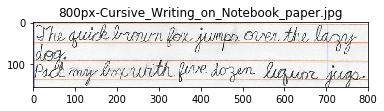

In [1]:
import cv2
from skimage import io

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Cursive_Writing_on_Notebook_paper.jpg/800px-Cursive_Writing_on_Notebook_paper.jpg'
image = io.imread(url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image)
plt.title(url.split('/')[-1])
plt.show()

In [2]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, requests, time, json

###############################################
#### Update or verify the following values. ###
###############################################

# Replace the subscription_key string value with your valid subscription key.
from azure_cfg import api_key
subscription_key = api_key

# Replace or verify the region.
#
# You must use the same region in your REST API call as you used to obtain your subscription keys.
# For example, if you obtained your subscription keys from the westus region, replace 
# "westcentralus" in the URI below with "westus".
#
# NOTE: Free trial subscription keys are generated in the westcentralus region, so if you are using
# a free trial subscription key, you should not need to change this region.
uri_base = 'https://westcentralus.api.cognitive.microsoft.com'

requestHeaders = {
    # Request headers.
    # Another valid content type is "application/octet-stream".
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

# The URL of a JPEG image containing handwritten text.
body = {'url' : url}

# For printed text, set "handwriting" to false.
params = {'handwriting' : 'true'}

try:
    # This operation requrires two REST API calls. One to submit the image for processing,
    # the other to retrieve the text found in the image. 
    #
    # This executes the first REST API call and gets the response.
    response = requests.request('POST', uri_base + '/vision/v1.0/RecognizeText', json=body, data=None, headers=requestHeaders, params=params)

    # Success is indicated by a status of 202.
    if response.status_code != 202:
        # if the first REST API call was not successful, display JSON data and exit.
        parsed = json.loads(response.text)
        print ("Error:")
        print (json.dumps(parsed, sort_keys=True, indent=2))
        exit()

    # The 'Operation-Location' in the response contains the URI to retrieve the recognized text.
    operationLocation = response.headers['Operation-Location']

    # Note: The response may not be immediately available. Handwriting recognition is an
    # async operation that can take a variable amount of time depending on the length
    # of the text you want to recognize. You may need to wait or retry this GET operation.

    print('\nHandwritten text submitted. Waiting 10 seconds to retrieve the recognized text.\n')
    time.sleep(10)

    # Execute the second REST API call and get the response.
    response = requests.request('GET', operationLocation, json=None, data=None, headers=requestHeaders, params=None)

    # 'data' contains the JSON data. The following formats the JSON data for display.
    parsed = json.loads(response.text)
    print ("Response:")
    print (json.dumps(parsed, sort_keys=True, indent=2))

except Exception as e:
    print('Error:')
    print(e)


Handwritten text submitted. Waiting 10 seconds to retrieve the recognized text.

Response:
{
  "recognitionResult": {
    "lines": [
      {
        "boundingBox": [
          2,
          52,
          65,
          46,
          69,
          89,
          7,
          95
        ],
        "text": "dog",
        "words": [
          {
            "boundingBox": [
              0,
              57,
              65,
              42,
              79,
              85,
              11,
              100
            ],
            "text": "dog"
          }
        ]
      },
      {
        "boundingBox": [
          6,
          2,
          771,
          13,
          770,
          75,
          5,
          64
        ],
        "text": "The quick brown fox jumps over the lazy",
        "words": [
          {
            "boundingBox": [
              16,
              4,
              89,
              5,
              74,
              71,
              1,
              71
  

In [3]:
parsed['recognitionResult']['lines']

[{'boundingBox': [2, 52, 65, 46, 69, 89, 7, 95],
  'text': 'dog',
  'words': [{'boundingBox': [0, 57, 65, 42, 79, 85, 11, 100], 'text': 'dog'}]},
 {'boundingBox': [6, 2, 771, 13, 770, 75, 5, 64],
  'text': 'The quick brown fox jumps over the lazy',
  'words': [{'boundingBox': [16, 4, 89, 5, 74, 71, 1, 71], 'text': 'The'},
   {'boundingBox': [89, 5, 188, 5, 173, 72, 74, 71], 'text': 'quick'},
   {'boundingBox': [188, 5, 323, 6, 308, 73, 173, 72], 'text': 'brown'},
   {'boundingBox': [320, 6, 386, 6, 371, 73, 305, 73], 'text': 'fox'},
   {'boundingBox': [396, 7, 508, 7, 493, 74, 381, 73], 'text': 'jumps'},
   {'boundingBox': [505, 7, 604, 8, 589, 75, 490, 74], 'text': 'over'},
   {'boundingBox': [600, 8, 673, 8, 658, 75, 586, 75], 'text': 'the'},
   {'boundingBox': [670, 8, 792, 9, 777, 76, 655, 75], 'text': 'lazy'}]},
 {'boundingBox': [2, 84, 783, 96, 782, 154, 1, 148],
  'text': 'Pack my box with five dozen liquor jugs',
  'words': [{'boundingBox': [6, 86, 92, 87, 71, 151, 0, 150], 'te

In [4]:
# image_lines = image.copy()
# for line in parsed['recognitionResult']['lines']:
#     bounding_box = line['boundingBox']
#     top_left =
#     bottom_right =
#     image_lines = cv2.rectangle(image_lines, )
    